**Business Understanding**
Sebuah toko online dengan produk kebutuhan rumah yang terdapat beberapa barang, dari data tersebut kami ingin menganalisis data produk untuk memahami performa produk.

| Nama Kolom               | Deskripsi                                     |
|--------------------------|-----------------------------------------------|
| index                    | Indeks dari produk (sebagai penanda urutan).  |
| product                  | Judul produk (seperti yang tercantum).        |
| category                 | Kategori tempat produk diklasifikasikan.      |
| sub_category             | Subkategori tempat produk dikelompokkan.      |
| brand                    | Merek dari produk.                            |
| sales_price              | Harga produk yang dijual di situs.            |                       |
| market_price             | Harga pasar dari produk.                      |
| type                     | Jenis produk.                                 |
| rating                   | Penilaian yang diberikan konsumen terhadap produk.|       |

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('BigBasket Products.csv')

In [3]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### Statistical Summary

In [4]:
categoricals =  ['product', 'category', 'sub_category', 'brand', 'type','description']
numericals = ['sale_price', 'market_price']

In [5]:
df[numericals].describe()

,sale_price,market_price
count,27555.000000,27555.000000
mean,322.514808,382.056664
std,486.263116,581.730717
min,2.450000,3.000000
25%,95.000000,100.000000
50%,190.000000,220.000000
75%,359.000000,425.000000
max,12500.000000,12500.000000


#### Hasil Observasi Statistic Numerical
1. Mean
- sale_price: 322.51 → Rata-rata harga jual adalah sekitar 322.5.
- market_price: 382.05 → Rata-rata harga pasar adalah sekitar 382.1.
- Harga pasar cenderung lebih tinggi dibandingkan harga jual.
2. Quartile
- 25% (Q1 - Kuartil 1):
sale_price: 95.0
market_price: 100.0
25% dari data memiliki harga jual di bawah 95 dan harga pasar di bawah 100.
- 50% (Median - Kuartil 2):
sale_price: 190.0
market_price: 220.0
Harga jual median adalah 190 dan harga pasar median 220. Ini adalah nilai tengah dari data.
- 75% (Q3 - Kuartil 3):
sale_price: 359.0
market_price: 425.0
75% dari data memiliki harga jual di bawah 359 dan harga pasar di bawah 425.

In [6]:
df[categoricals].describe()

,product,category,sub_category,brand,type,description
count,27554,27555,27555,27554,27555,27440
unique,23540,11,90,2313,426,21944
top,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,Face Care,A brand inspired by the Greek goddess of victo...
freq,26,7867,2294,638,1508,47


In [7]:
len(df.drop_duplicates()) / len(df)
# Jika output nya 1 maka data ini tidak terdapat duplicate

1.0

In [8]:
# Untuk membuktikan bahwa data ini tidak ada duplikat sebagai berikut
duplicates = df[df.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


### Missing Value

In [9]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [10]:
total_rows = len(df)
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'index' Has 0 missing values (0.00%)
Column 'product' Has 1 missing values (0.00%)
Column 'category' Has 0 missing values (0.00%)
Column 'sub_category' Has 0 missing values (0.00%)
Column 'brand' Has 1 missing values (0.00%)
Column 'sale_price' Has 0 missing values (0.00%)
Column 'market_price' Has 0 missing values (0.00%)
Column 'type' Has 0 missing values (0.00%)
Column 'rating' Has 8626 missing values (31.30%)
Column 'description' Has 115 missing values (0.42%)


In [11]:
df['product'].fillna(df['product'].mode()[0], inplace=True)
df['brand'].fillna(df['brand'].mode()[0], inplace=True)
df['description'].fillna(df['description'].mode()[0], inplace=True)

C:\Users\aryak\AppData\Local\Temp\ipykernel_13896\2061134961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product'].fillna(df['product'].mode()[0], inplace=True)
C:\Users\aryak\AppData\Local\Temp\ipykernel_13896\2061134961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [12]:
df = df.drop(columns=['rating'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


### Outlier Handling

In [14]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

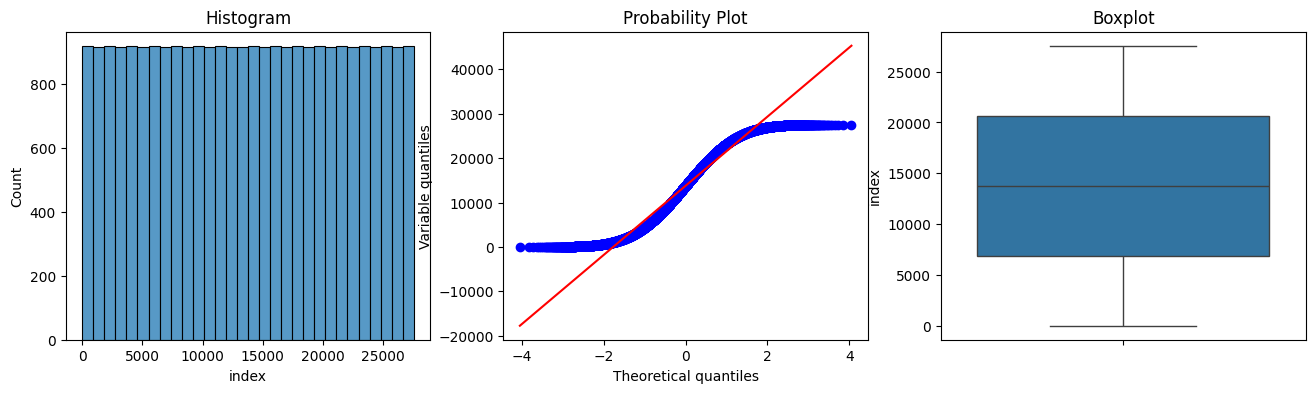

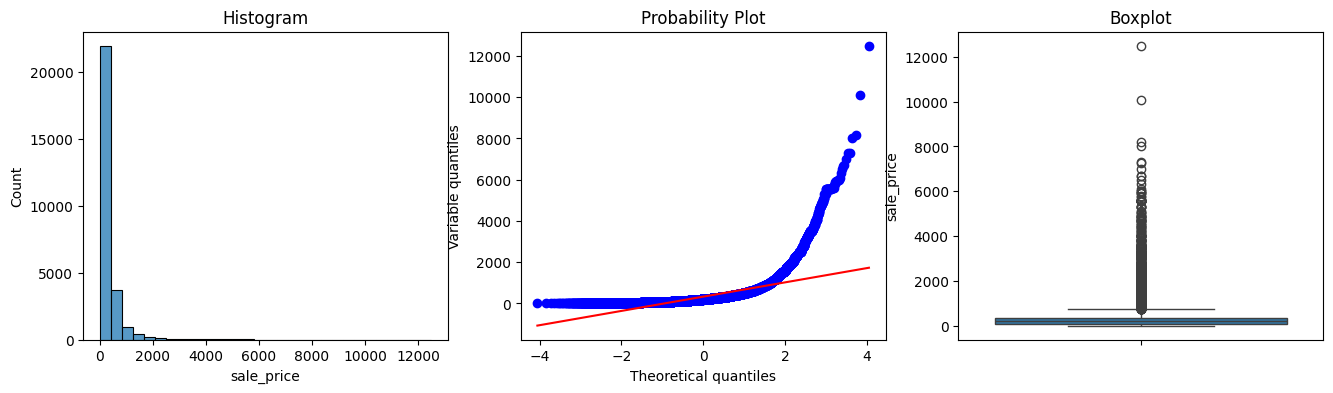

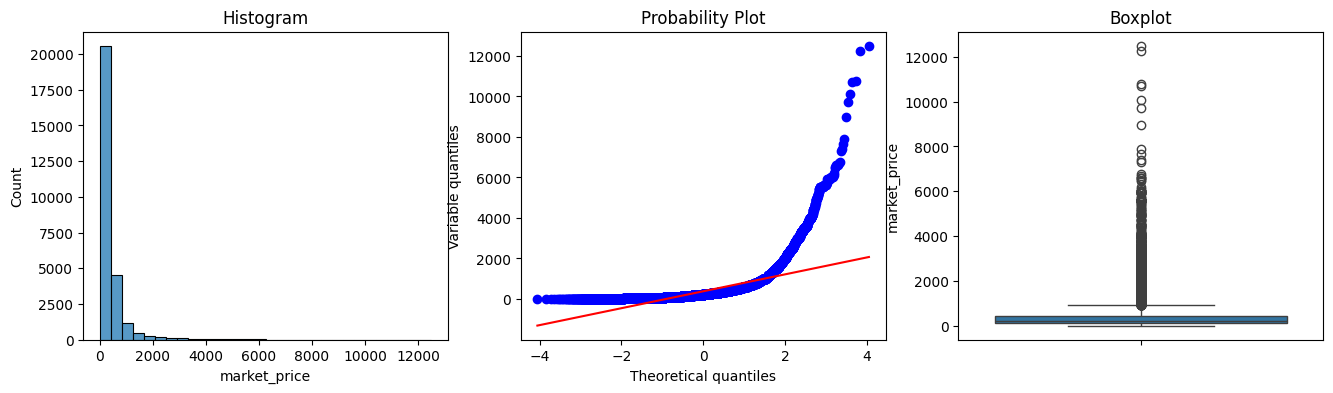

In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(df, col)

In [16]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [17]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df,'sale_price')
full_occup_upper_limit, full_occup_lower_limit

(np.float64(755.0), np.float64(-301.0))

In [18]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(df,'market_price')
full_occup_upper_limit, full_occup_lower_limit

(np.float64(912.5), np.float64(-387.5))

In [19]:
data_clf = df[(df['market_price'] <= full_occup_upper_limit) & (df['market_price'] >= full_occup_lower_limit)]

In [20]:
data_clf = df[(df['market_price'] <= full_occup_upper_limit) & (df['sale_price'] >= full_occup_lower_limit)]

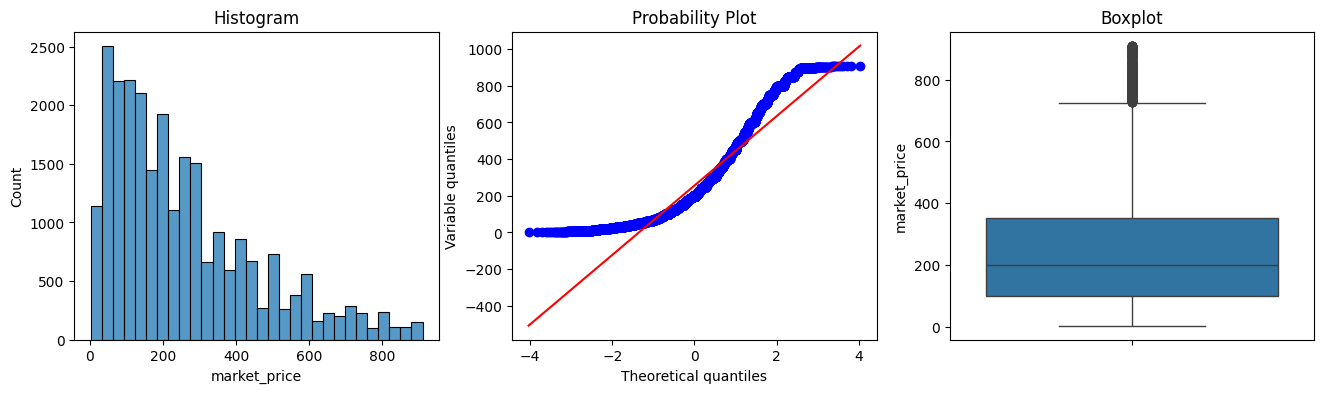

In [21]:
check_plot(data_clf, 'market_price')

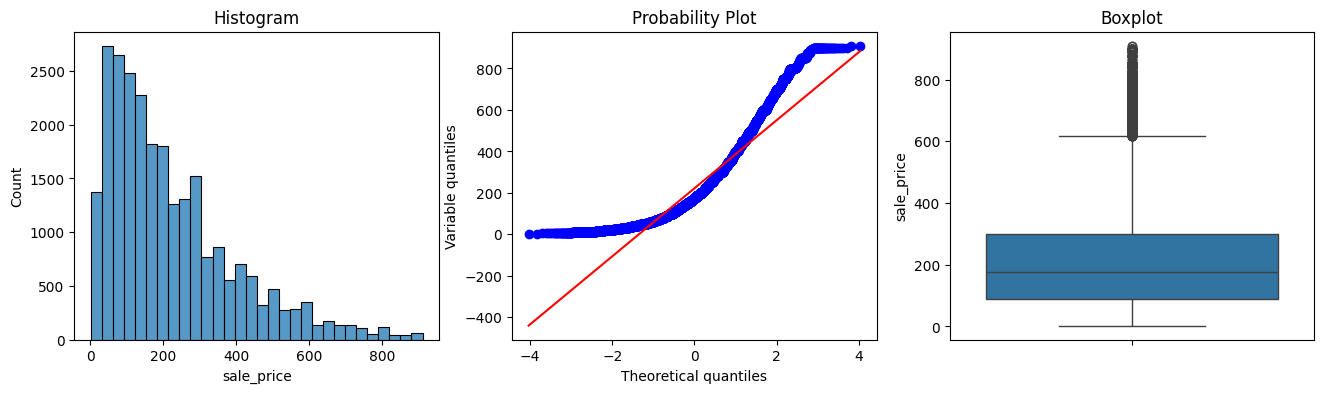

In [22]:
check_plot(data_clf, 'sale_price')

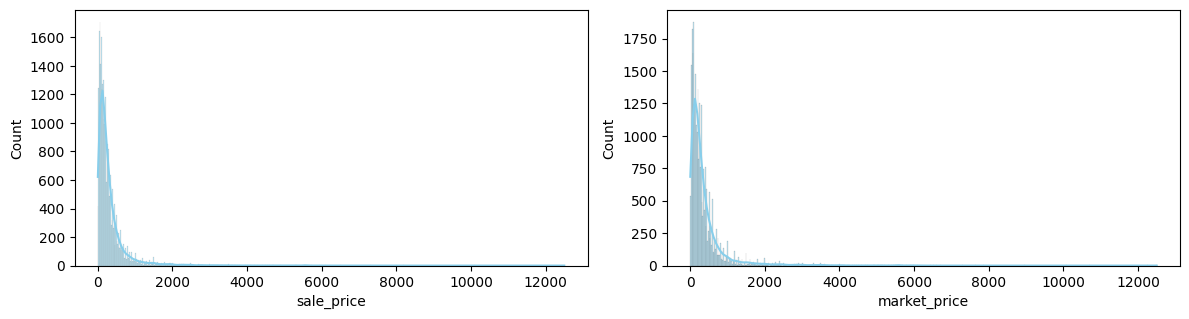

In [23]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


### EDA Question
1. Apa saja produk yang memiliki harga market diatas rata-rata

Apa saja produk yang memiliki harga market diatas rata-rata (Filtering)

In [25]:
df_filtered = df[df['market_price'] > df['market_price'].mean()]
df_filtered

,index,product,category,sub_category,brand,sale_price,market_price,type,description
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",Enjoy a tin full of delicious butter cookies m...
20,21,Ceramic Barrel Brush - Colour May Vary,Beauty & Hygiene,Hair Care,Bronson Professional,525.00,700.0,Tools & Accessories,This Ceramic Barrel Brush by Bronson Professio...
25,26,Insulated Hot Fresh Casserole For Roti/Chapati...,"Kitchen, Garden & Pets",Flask & Casserole,Cello,659.00,895.0,Casserole,Stop your worries about keeping your food warm...
34,35,Pet Solitaire Container Set - Silver,"Kitchen, Garden & Pets",Storage & Accessories,Steelo,499.00,969.0,Containers Sets,"The Steelo plastic PET Container Set, is made ..."
...,...,...,...,...,...,...,...,...,...
27542,27543,Embellish Skin Lightening Serum,Beauty & Hygiene,Skin Care,Organic Harvest,1525.75,1795.0,Face Care,Achieve an everlasting illuminated skin by inc...
27544,27545,"Brass Dhoop Aarti With Wooden Handle,No.3",Cleaning & Household,Pooja Needs,Trm,239.00,495.0,Other Pooja Needs,Dhoobakal is a vessel used for burning the Dho...
27548,27549,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,"Say no to dull, lifeless, dry and damaged hair..."
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,"Tetley Green Tea with its refreshing pure, ori..."


2. Berapa banyak jumlah produk di setiap category?

In [26]:
product_counts = df['category'].value_counts().sort_values(ascending=False)
product_counts

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

C:\Users\aryak\AppData\Local\Temp\ipykernel_13896\921321534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Jumlah Produk', data=product_counts_by_category, palette='viridis')


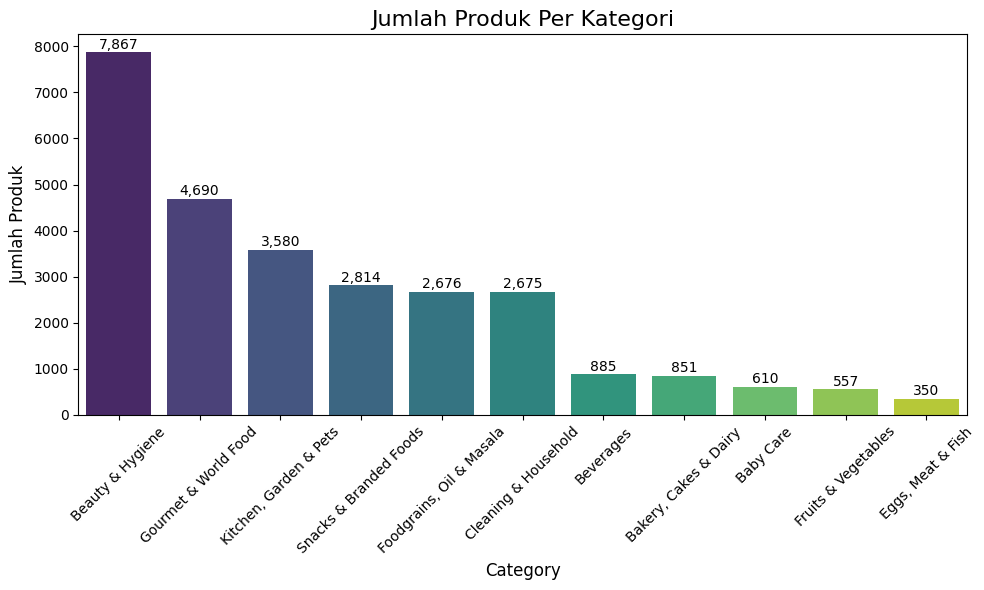

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk per kategori
product_counts_by_category = df['category'].value_counts().reset_index()
product_counts_by_category.columns = ['Category', 'Jumlah Produk']
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Jumlah Produk', data=product_counts_by_category, palette='viridis')
for i, count in enumerate(product_counts_by_category['Jumlah Produk']):
    plt.text(i, count + (0.01 * product_counts_by_category['Jumlah Produk'].max()), f"{count:,.0f}", 
             ha='center', fontsize=10, color='black')
plt.title('Jumlah Produk Per Kategori', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()


3. Produk apa yang memiliki harga penjualan (sale_price) rata-rata tertinggi di setiap kategori (category)?

In [28]:
avg_sale_price_by_category = df.groupby('category')['sale_price'].mean().sort_values(ascending=False)
avg_sale_price_by_category

category
Baby Care                   534.946180
Kitchen, Garden & Pets      507.524615
Beauty & Hygiene            418.679197
Gourmet & World Food        319.854011
Eggs, Meat & Fish           288.897486
Beverages                   239.758949
Cleaning & Household        226.173118
Foodgrains, Oil & Masala    193.167500
Bakery, Cakes & Dairy       142.802750
Snacks & Branded Foods      129.593134
Fruits & Vegetables          50.889336
Name: sale_price, dtype: float64

### Implementasi K-Means Clustering

**K-Means Clustering** hanya dapat bekerja dengan **data numerik**. Sebelum kita mulai, mari kita pahami masalah yang akan kita hadapi.

Kita memiliki dataset **BigBasket_products** yang berisi data penjualan produk. Dalam dataset ini, kita memiliki beberapa kolom seperti:

* **index:** Nomor urut data
* **product_category:** Kategori produk
* **sub_category:** Subkategori produk
* **brand:** Merek produk
* **sale_price:** Harga jual
* **market_price:** Harga pasaran
* **type:** Jenis produk
* **description:** Jumlah total uang yang telah dihabiskan pelanggan untuk produk tersebut

**Tujuan kita:** menentukan harga jual unutk setiap kategori barang agar mendapat keuntungan

- Menghitung keuntungan per produk:

\text{Profit Per Item} = \text{sale_price} - \text{market_price}
Menganalisis strategi harga:

Kalau sale_price < market_price, artinya kamu menjual lebih murah dari harga pasar (diskon/promo).
Kalau sale_price > market_price, berarti kamu menjual lebih mahal dari harga pasar (premium pricing).
Mengukur performa kategori/subkategori:
Menggunakan profit untuk menentukan mana kategori/subkategori yang paling menguntungkan.



In [29]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27555 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   description   27555 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


(None,
    index                                            product  \
 0      1             Garlic Oil - Vegetarian Capsule 500 mg   
 1      2                              Water Bottle - Orange   
 2      3                     Brass Angle Deep - Plain, No.2   
 3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
 4      5                 Creme Soft Soap - For Hands & Body   
 
                  category           sub_category              brand  \
 0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
 1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
 2    Cleaning & Household            Pooja Needs                Trm   
 3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
 4        Beauty & Hygiene       Bath & Hand Wash              Nivea   
 
    sale_price  market_price                      type  \
 0       220.0         220.0          Hair Oil & Serum   
 1       180.0         180.0    Water & Fridge Bottles   

In [30]:
df.describe()

,index,sale_price,market_price
count,27555.00000,27555.000000,27555.000000
mean,13778.00000,322.514808,382.056664
std,7954.58767,486.263116,581.730717
min,1.00000,2.450000,3.000000
25%,6889.50000,95.000000,100.000000
50%,13778.00000,190.000000,220.000000
75%,20666.50000,359.000000,425.000000
max,27555.00000,12500.000000,12500.000000


### Data Preparation

### Seperti yang telah disebutkan sebelumnya bahwa, tujuan analisis yang dilakukan pada case ini adalah untuk memperoleh keuntungan harga dari kolom sale_price dan market_price 

Menghitung keuntungan: (\text{sale_price} - \text{market_price}) untuk setiap produk.

In [31]:
df['profit'] = df['sale_price'] - df['market_price']

Performansi Kategori Penjualan

Mengelompokkan data berdasarkan category untuk melihat total keuntungan dan jumlah produk.

In [32]:
category_summary = df.groupby('category').agg(
    total_profit=('profit', 'sum'),
    total_products=('product', 'count')
).reset_index()
print(category_summary)


                    category  total_profit  total_products
0                  Baby Care     -37702.83             610
1      Bakery, Cakes & Dairy     -12831.86             851
2           Beauty & Hygiene    -588892.98            7867
3                  Beverages     -28740.33             885
4       Cleaning & Household     -96137.26            2675
5          Eggs, Meat & Fish     -12928.30             350
6   Foodgrains, Oil & Masala     -98916.77            2676
7        Fruits & Vegetables      -7544.19             557
8       Gourmet & World Food    -180878.64            4690
9     Kitchen, Garden & Pets    -544636.28            3580
10    Snacks & Branded Foods     -31466.42            2814


In [33]:
subcategory_summary = df.groupby('sub_category').agg(
    total_profit=('profit', 'sum'),
    total_products=('product', 'count')
).reset_index()
print(subcategory_summary)


                sub_category  total_profit  total_products
0       All Purpose Cleaners     -10438.46             475
1   Appliances & Electricals     -22344.55             138
2       Atta, Flours & Sooji      -4961.36             152
3           Baby Accessories          0.00              37
4        Baby Bath & Hygiene      -2958.73             206
..                       ...           ...             ...
85            Steel Utensils     -96509.00             353
86     Storage & Accessories    -130170.00            1015
87                       Tea     -19367.48             334
88   Tinned & Processed Food      -2342.15             168
89                     Water        -45.75              17

[90 rows x 3 columns]


### Model Building

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pickle

In [35]:
features_for_clustering = ['sale_price', 'market_price']
X = df[features_for_clustering]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

In [38]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\aryak\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aryak\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,

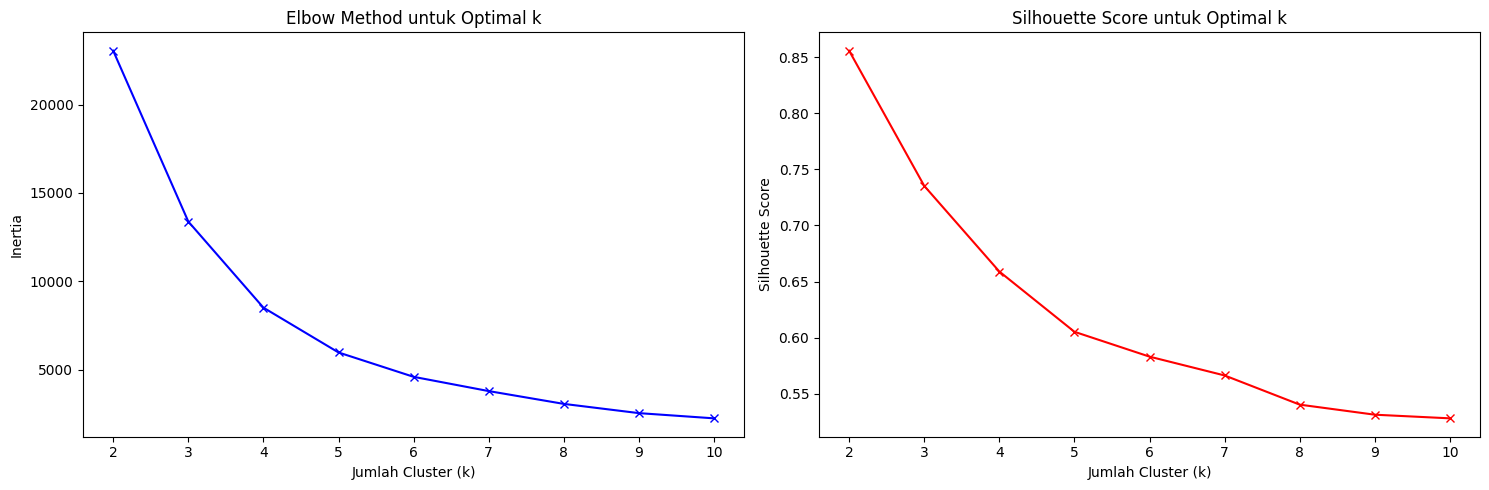

In [39]:
# Visualisasi elbow method dan silhouette score
plt.figure(figsize=(15, 5))

# Plot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Optimal k')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Optimal k')
plt.tight_layout()
plt.show()

In [40]:
optimal_k = 3  # Sesuaikan dengan hasil elbow method
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

In [41]:
cluster_summary = df.groupby('cluster').agg({
    'sale_price': ['mean', 'count'],
    'market_price': 'mean'
}).round(2)

In [42]:
print("\nRingkasan Cluster:")
print(cluster_summary)


Ringkasan Cluster:
        sale_price        market_price
              mean  count         mean
cluster                               
0           199.47  24327       232.38
1          3306.76    368      3939.94
2           985.17   2860      1197.37


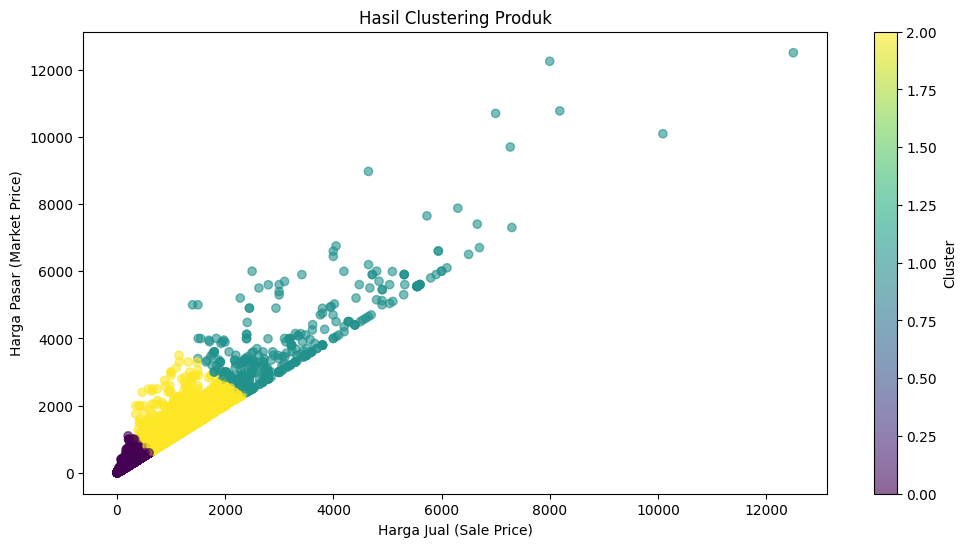

In [43]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['sale_price'], df['market_price'], 
                     c=df['cluster'], cmap='viridis',
                     alpha=0.6)
plt.xlabel('Harga Jual (Sale Price)')
plt.ylabel('Harga Pasar (Market Price)')
plt.title('Hasil Clustering Produk')
plt.colorbar(scatter, label='Cluster')

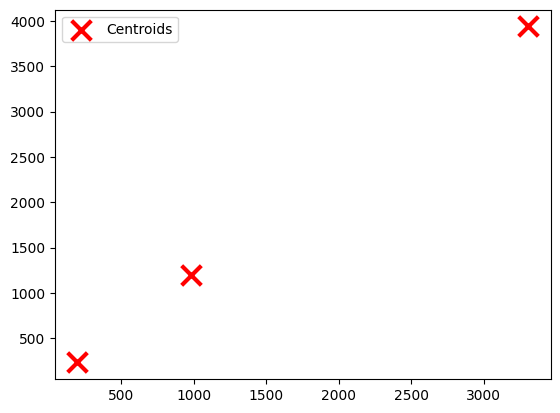

In [44]:
centroids = final_kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           c='red', marker='x', s=200, linewidths=3, 
           label='Centroids')
plt.legend()
plt.show()

In [45]:
print("\nKarakteristik Cluster:")
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Jumlah produk: {len(cluster_data)}")
    print(f"Rata-rata harga jual: {cluster_data['sale_price'].mean():.2f}")
    print(f"Rata-rata harga pasar: {cluster_data['market_price'].mean():.2f}")


Karakteristik Cluster:

Cluster 0:
Jumlah produk: 24327
Rata-rata harga jual: 199.47
Rata-rata harga pasar: 232.38

Cluster 1:
Jumlah produk: 368
Rata-rata harga jual: 3306.76
Rata-rata harga pasar: 3939.94

Cluster 2:
Jumlah produk: 2860
Rata-rata harga jual: 985.17
Rata-rata harga pasar: 1197.37


In [46]:
# Simpan model menggunakan pickle
model_filename = 'kmeans_model.pkl'
# Simpan model K-Means
with open(model_filename, 'wb') as file:
    pickle.dump(final_kmeans, file)


### Regression Linear

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
X = df[['market_price']]  # variabel independen
y = df['sale_price']      # variabel dependen

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [53]:
print("Hasil Analisis Regresi Linear:")
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Coefficient (b1): {model.coef_[0]:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Hasil Analisis Regresi Linear:
Intercept (b0): 14.04
Coefficient (b1): 0.81
R-squared (R²): 0.9255
Root Mean Square Error (RMSE): 130.05


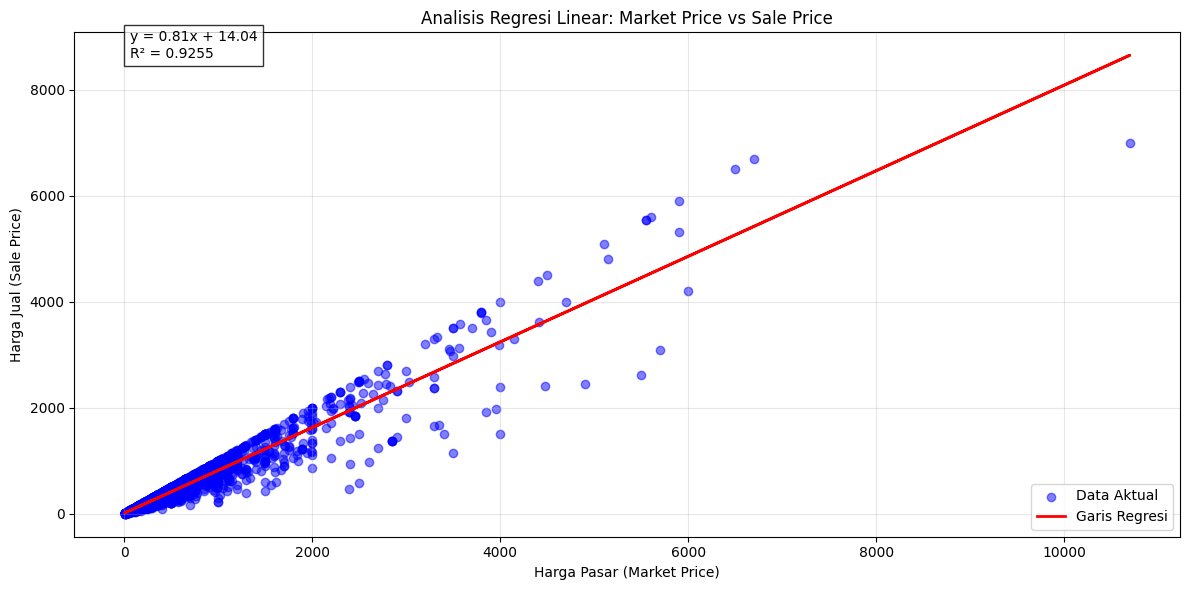

In [54]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Plot data asli
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Aktual')

# Plot garis regresi
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Regresi')

plt.xlabel('Harga Pasar (Market Price)')
plt.ylabel('Harga Jual (Sale Price)')
plt.title('Analisis Regresi Linear: Market Price vs Sale Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Tambahkan persamaan regresi dan R² pada plot
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r2_text = f'R² = {r2:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r2_text, 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

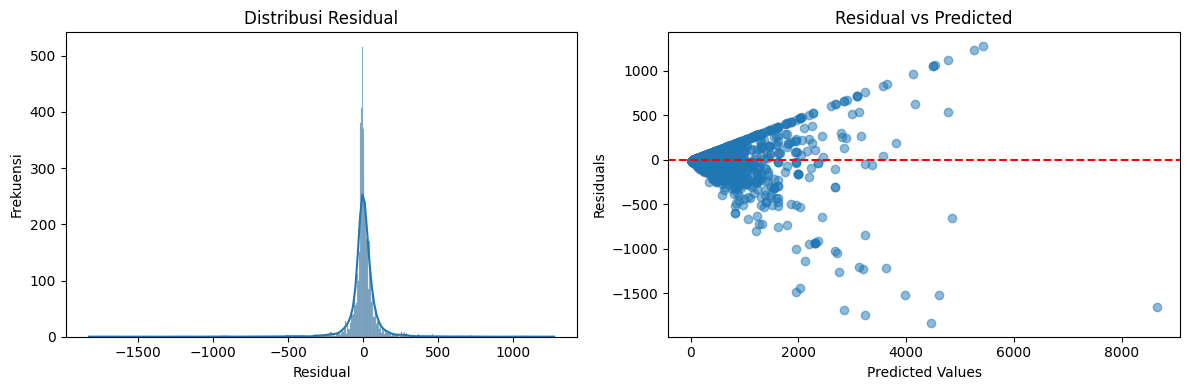

In [55]:
# Analisis residual
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

# Plot distribusi residual
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Plot residual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [56]:
# Contoh penggunaan model untuk prediksi
print("\nContoh Prediksi:")
sample_prices = np.array([[100], [500], [1000]])
predictions = model.predict(sample_prices)
for market_price, predicted_sale_price in zip(sample_prices, predictions):
    print(f"Market Price: {market_price[0]:.2f} -> Predicted Sale Price: {predicted_sale_price:.2f}")


Contoh Prediksi:
Market Price: 100.00 -> Predicted Sale Price: 94.79
Market Price: 500.00 -> Predicted Sale Price: 417.80
Market Price: 1000.00 -> Predicted Sale Price: 821.55


C:\Users\aryak\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
# Simpan model
import pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Persiapkan data
X = df[['market_price']]  # variabel independen
# Pastikan sale_price selalu lebih tinggi dari market_price
y = df.apply(lambda row: max(row['sale_price'], row['market_price'] * 1.1), axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Buat dan latih model Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=5,
                      random_state=42)

In [62]:
# Custom prediction function untuk memastikan sale_price > market_price
def predict_sale_price(model, market_prices):
    predictions = model.predict(market_prices)
    # Tambahkan margin minimal 10% dari market_price
    market_prices_array = market_prices['market_price'].values
    adjusted_predictions = np.maximum(predictions, market_prices_array * 1.1)
    return adjusted_predictions

In [63]:
# Lakukan prediksi dengan fungsi custom
y_pred = predict_sale_price(dt_model, X_test)

In [64]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [65]:
print("Hasil Analisis Decision Tree:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Hasil Analisis Decision Tree:
R-squared (R²): 0.9999
Root Mean Square Error (RMSE): 6.18


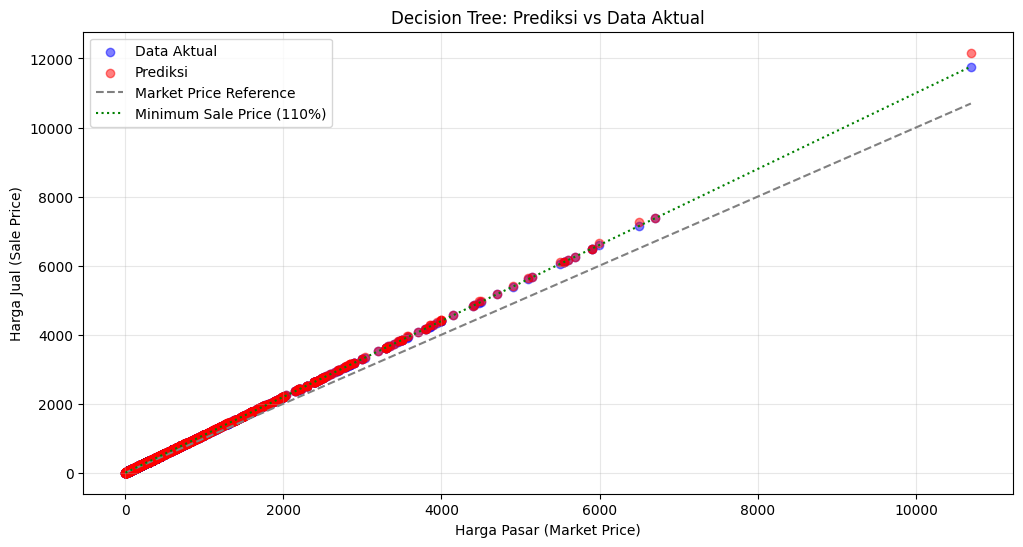

In [66]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Aktual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Prediksi')

# Tambahkan garis referensi market_price
x_min, x_max = X_test['market_price'].min(), X_test['market_price'].max()
x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
plt.plot([x_min, x_max], [x_min, x_max], '--', color='gray', label='Market Price Reference')
plt.plot([x_min, x_max], [x_min*1.1, x_max*1.1], ':', color='green', label='Minimum Sale Price (110%)')

plt.xlabel('Harga Pasar (Market Price)')
plt.ylabel('Harga Jual (Sale Price)')
plt.title('Decision Tree: Prediksi vs Data Aktual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

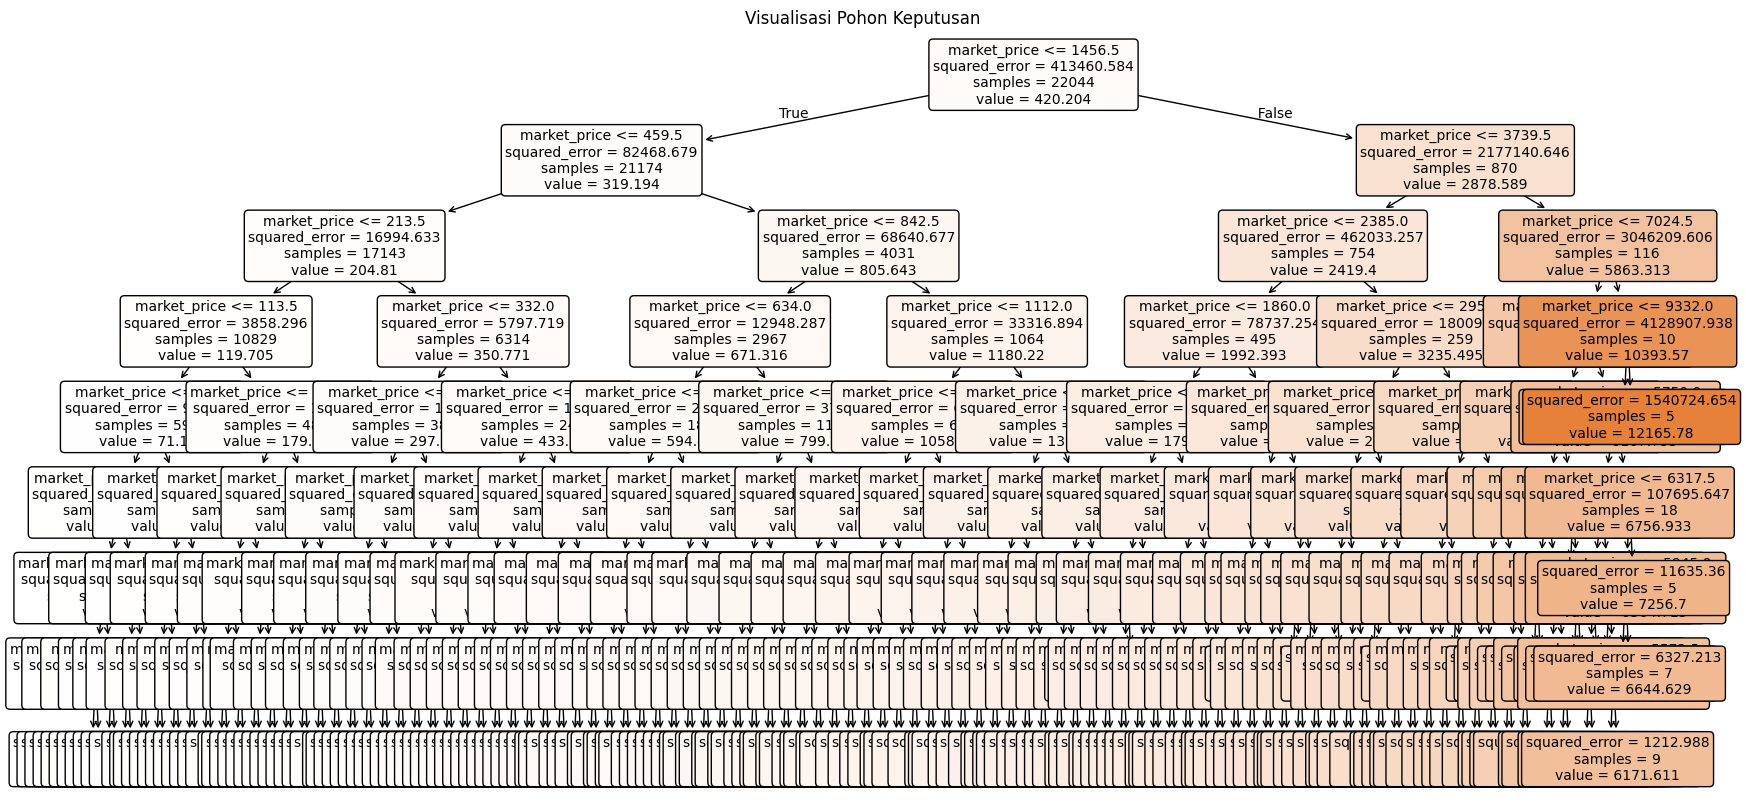

In [67]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=['market_price'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Visualisasi Pohon Keputusan')
plt.show()

In [68]:
# Feature importance
importance = dt_model.feature_importances_
print("\nFeature Importance:")
for feature, imp in zip(['market_price'], importance):
    print(f"{feature}: {imp:.4f}")


Feature Importance:
market_price: 1.0000


In [69]:
# Contoh penggunaan model untuk prediksi
print("\nContoh Prediksi:")
sample_prices = pd.DataFrame({'market_price': [100, 500, 1000]})
predictions = predict_sale_price(dt_model, sample_prices)
for market_price, predicted_sale_price in zip(sample_prices['market_price'], predictions):
    margin = ((predicted_sale_price - market_price) / market_price) * 100
    print(f"Market Price: {market_price:.2f} -> Predicted Sale Price: {predicted_sale_price:.2f} (Margin: {margin:.1f}%)")


Contoh Prediksi:
Market Price: 100.00 -> Predicted Sale Price: 110.00 (Margin: 10.0%)
Market Price: 500.00 -> Predicted Sale Price: 550.00 (Margin: 10.0%)
Market Price: 1000.00 -> Predicted Sale Price: 1100.00 (Margin: 10.0%)


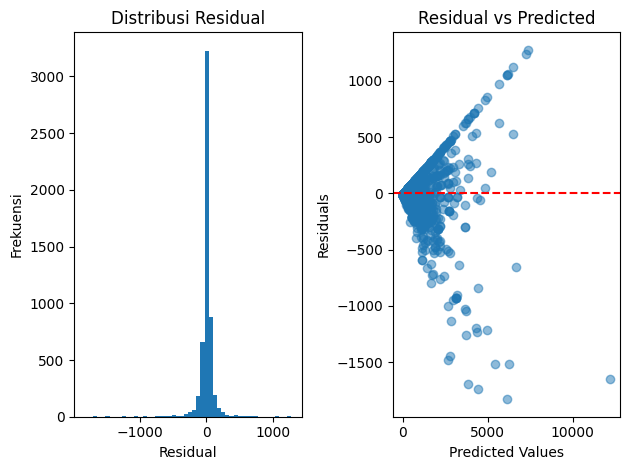

In [70]:
# Plot distribusi residual
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Plot residual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [71]:
# Simpan model
import pickle
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(dt_model, file)